In [33]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [34]:
data=pd.read_csv('Final_Data1.csv',parse_dates=['Date'])
data['Ratings']=data['Ratings']*10
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,Hotel,Review,Date,Ratings
0,Conrad_Bengaluru,My second stay here but still loving every mom...,June 2021,50.0
1,Conrad_Bengaluru,In a neighbourhood filled with a lot of ageing...,June 2021,50.0
2,Conrad_Bengaluru,A really enjoyable staycation. We were celebra...,April 2021,50.0
3,Conrad_Bengaluru,"Absolutely love the staff, they were hospitabl...",April 2021,50.0
4,Conrad_Bengaluru,We visited to Conrad April 2021 to celebrate m...,April 2021,50.0


In [36]:
len(data['Hotel'].unique())

13

In [4]:
docs= data['Review']
docs

0        My second stay here but still loving every mom...
1        In a neighbourhood filled with a lot of ageing...
2        A really enjoyable staycation. We were celebra...
3        Absolutely love the staff, they were hospitabl...
4        We visited to Conrad April 2021 to celebrate m...
                               ...                        
12995    Though I have stayed in Bangalore for 4 Years ...
12996    The staff is great, very pleasant and unobtrus...
12997    When I was checking out last week , there was ...
12998    Service was very good as well as facilities we...
12999    I keep coming back to this hotel. Right from t...
Name: Review, Length: 13000, dtype: object

In [5]:
df=data[data['Hotel']=='Lemon_Tree_Hotel']
print(df.shape)
df.head()

(1000, 4)


,Hotel,Review,Date,Ratings
5000,Lemon_Tree_Hotel,House keeping is so good..Very responsible per...,June 2021,50.0
5001,Lemon_Tree_Hotel,"During this covid time,it is clean and safe pl...",June 2021,50.0
5002,Lemon_Tree_Hotel,I have checked into lemon tree hotels on June ...,June 2021,50.0
5003,Lemon_Tree_Hotel,Lemon tree hotel is one of the best hotel in m...,June 2021,50.0
5004,Lemon_Tree_Hotel,Very comfortable stay and staff are very frien...,June 2021,50.0


In [6]:
reviews=pd.DataFrame(''.join(df['Review']).split('.')).replace('',np.NaN).dropna().rename(columns={0:'Review'})
reviews

,Review
0,House keeping is so good
2,Very responsible persons
3,They give value to the Opinion of visitors
4,Hotel management is also good
5,Cab facilities also very good
...,...
5548,Food was prepared as it was directed
5549,Sonali and Lalit were very quick at service
5550,The gym and swimming pool area are neat and c...
5551,house cleaning department is also very attentive


In [7]:
analyzer=SentimentIntensityAnalyzer()
reviews['Sentiment']=reviews['Review'].apply(lambda v:analyzer.polarity_scores(v)['compound'])
reviews

,Review,Sentiment
0,House keeping is so good,0.5777
2,Very responsible persons,0.3804
3,They give value to the Opinion of visitors,0.3400
4,Hotel management is also good,0.4404
5,Cab facilities also very good,0.4927
...,...,...
5548,Food was prepared as it was directed,0.2263
5549,Sonali and Lalit were very quick at service,0.0000
5550,The gym and swimming pool area are neat and c...,0.6908
5551,house cleaning department is also very attentive,0.0000


In [8]:
def get_sentiment_label(compound_score):
    if compound_score > 0.2:
        return 'positive'
    elif compound_score < -0.2:
        return 'negative'
    else:
        return 'neutral'

In [9]:
reviews['category']=reviews['Sentiment'].apply(get_sentiment_label)

In [10]:
reviews

,Review,Sentiment,category
0,House keeping is so good,0.5777,positive
2,Very responsible persons,0.3804,positive
3,They give value to the Opinion of visitors,0.3400,positive
4,Hotel management is also good,0.4404,positive
5,Cab facilities also very good,0.4927,positive
...,...,...,...
5548,Food was prepared as it was directed,0.2263,positive
5549,Sonali and Lalit were very quick at service,0.0000,neutral
5550,The gym and swimming pool area are neat and c...,0.6908,positive
5551,house cleaning department is also very attentive,0.0000,neutral


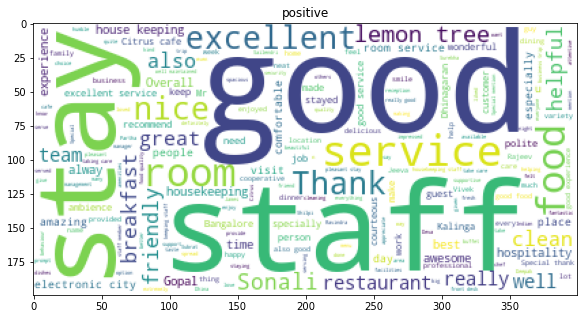

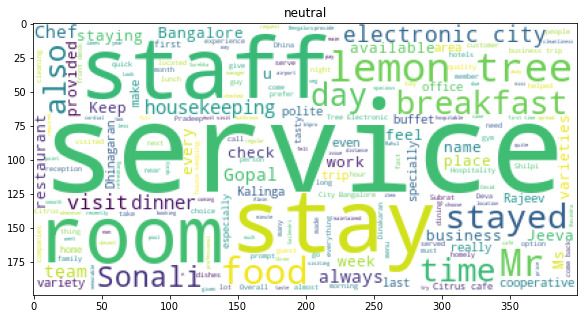

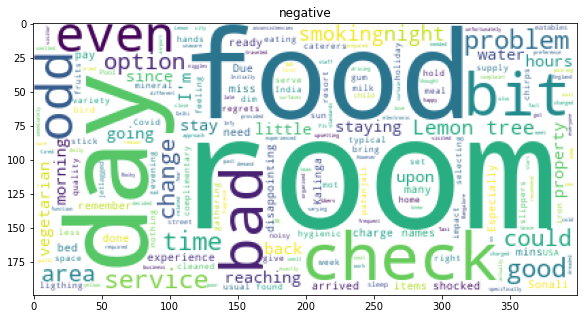

In [32]:
#i=131
for category in reviews['category'].unique():
    plt.figure(figsize=(14,5))
    t=reviews[reviews['category']==category]['Review'].fillna('Not Available')
    stopwords=nltk.corpus.stopwords.words('english')
    custom_stopwords=['use', 'will', 'get', 'one', 'would', 'like','hotel']
    all_stopwords= np.hstack([stopwords,custom_stopwords])
    docs_strings= ' '.join(t)
    wc=WordCloud(background_color='white',stopwords=all_stopwords).generate(docs_strings)
    #plt.subplot(i)
    plt.imshow(wc)
    plt.title(category)
    #plt.show(ax=axarr[0][0])
    #i=i+1